In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Load Data

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DT-Wage.csv')

In [45]:
df.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [46]:
df.shape

(3000, 11)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [48]:
df.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [49]:
df.isnull().sum()

,0
year,0
age,0
maritl,0
race,0
education,0
region,0
jobclass,0
health,0
health_ins,0
logwage,0


Separate categorical and numerical columns

In [50]:
un = df['maritl'].unique()
print(un)

['1. Never Married' '2. Married' '4. Divorced' '3. Widowed' '5. Separated']


In [51]:
un = df['race'].unique()
print(un)

['1. White' '3. Asian' '4. Other' '2. Black']


In [52]:
un = df['education'].unique()
print(un)

['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']


In [53]:
un = df['region'].unique()
print(un)

['2. Middle Atlantic']


In [54]:
un = df['jobclass'].unique()
print(un)

['1. Industrial' '2. Information']


In [55]:
un = df['health'].unique()
print(un)

['1. <=Good' '2. >=Very Good']


In [56]:
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(exclude=['object']).columns


One-hot encode for categorical features

In [57]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical))
encoded_df.index = df.index


In [58]:
df = df.drop(categorical, axis=1)
df = pd.concat([df, encoded_df], axis=1)


In [59]:
X = df.drop(columns=['wage'])
y = df['wage']

In [60]:
X.head()

,year,age,logwage,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No
0,2006,18,4.318063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2004,24,4.255273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,2003,45,4.875061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2003,43,5.041393,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2005,50,4.318063,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
X.shape

(3000, 17)

In [62]:
corr = df.corr()

target = corr['wage'].sort_values(ascending=False)

print("Correlation of each feature with the target variable (wage):")
print(target)

Correlation of each feature with the target variable (wage):
wage                            1.000000
logwage                         0.950683
education_5. Advanced Degree    0.382369
maritl_2. Married               0.256713
jobclass_2. Information         0.206897
age                             0.195637
education_4. College Grad       0.165898
health_2. >=Very Good           0.152337
year                            0.065544
race_3. Asian                   0.053504
maritl_3. Widowed              -0.023278
maritl_5. Separated            -0.034353
education_3. Some College      -0.049767
maritl_4. Divorced             -0.055318
race_4. Other                  -0.058202
race_2. Black                  -0.079663
education_2. HS Grad           -0.263972
health_ins_2. No               -0.308310
Name: wage, dtype: float64


Standardize features

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split data: 70% train, 15% validate, 15% test

In [64]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [65]:
X_train.shape

(2100, 17)

In [66]:
X_val.shape

(450, 17)

In [67]:
X_test.shape

(450, 17)

In [68]:
X_train

array([[ 1.09041746, -1.24905242, -0.88566318, ..., -0.97108454,
         0.63289827, -0.66349863],
       [-1.37770717, -1.50900691, -0.72780625, ..., -0.97108454,
         0.63289827,  1.50716211],
       [-0.88408224, -0.90244644, -0.00196921, ...,  1.02977646,
         0.63289827, -0.66349863],
       ...,
       [ 0.59679254, -1.24905242, -0.50266379, ...,  1.02977646,
         0.63289827,  1.50716211],
       [-0.39045732,  0.74393197,  0.12813678, ...,  1.02977646,
         0.63289827, -0.66349863],
       [ 1.58404239,  1.17718945, -0.7782159 , ...,  1.02977646,
        -1.58003275,  1.50716211]])

## SVR

In [69]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
svr = SVR()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5],
}


In [30]:
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'epsilon': [0.1, 0.2, 0.5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error')

In [31]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 100, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [32]:
best_svr = grid_search.best_estimator_

In [33]:
y_pred_val = best_svr.predict(X_val)

In [34]:
def custom_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def custom_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [35]:
mse = custom_mse(y_val, y_pred_val)
r2 = custom_r2(y_val, y_pred_val)
print(f"Validation MSE: {mse}")
print(f"Validation R^2: {r2}")

Validation MSE: 17.128853254101294
Validation R^2: 0.9894023756216496


In [36]:
y_pred_test = best_svr.predict(X_test)

In [37]:
test_mse = custom_mse(y_test, y_pred_test)
test_r2 = custom_r2(y_test, y_pred_test)
print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")

Test MSE: 20.438678887214994
Test R^2: 0.9876228070471577


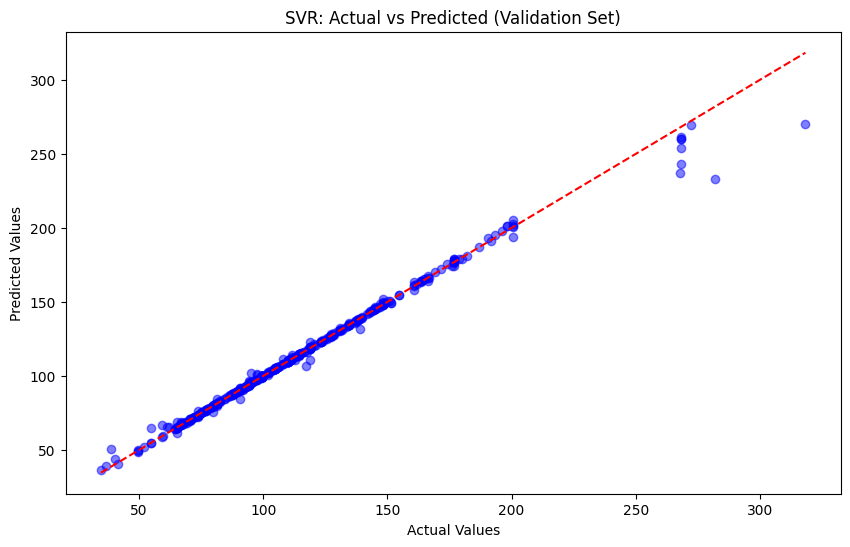

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, color='blue', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.title("SVR: Actual vs Predicted (Validation Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

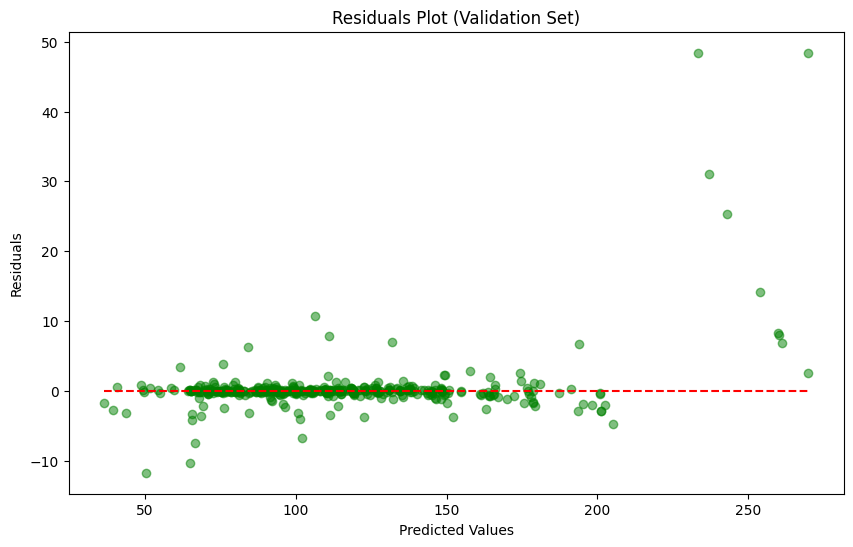

In [39]:
residuals = y_val - y_pred_val
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_val, residuals, color='green', alpha=0.5)
plt.hlines(0, xmin=min(y_pred_val), xmax=max(y_pred_val), colors='red', linestyle='--')
plt.title("Residuals Plot (Validation Set)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

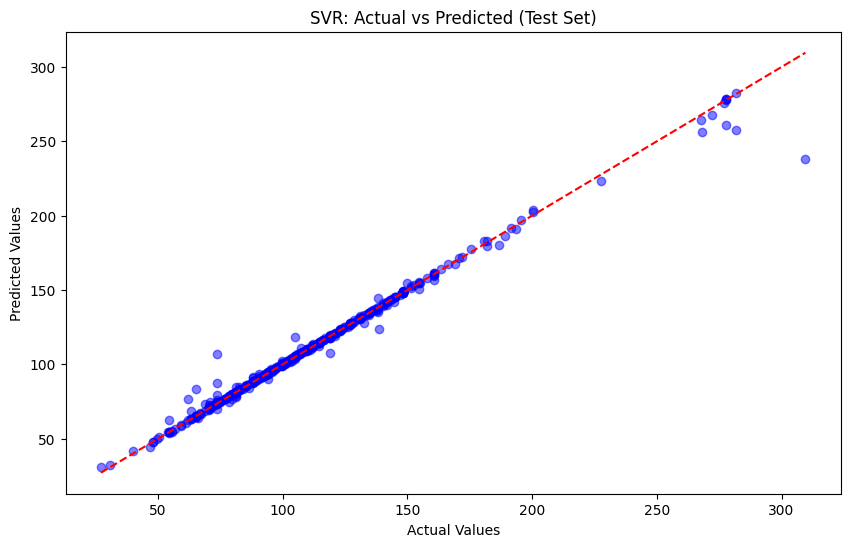

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("SVR: Actual vs Predicted (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

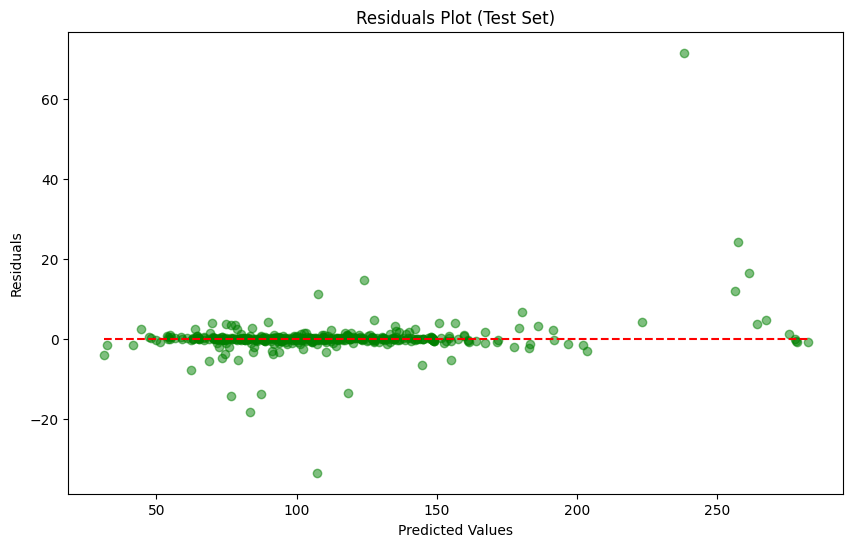

In [41]:
residuals_test = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_test, color='green', alpha=0.5)
plt.hlines(0, xmin=min(y_pred_test), xmax=max(y_pred_test), colors='red', linestyle='--')
plt.title("Residuals Plot (Test Set)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()